# Exploring Dandiset 001375: Septum GABA disruption with DREADDs

**Important Note:** This notebook was AI-generated to assist in exploring Dandiset 001375. While efforts have been made to ensure accuracy, the code and interpretations have not been fully verified by human experts. Please use caution and critically evaluate any results or conclusions drawn from this notebook.

## Overview of the Dandiset

This notebook explores Dandiset [001375 (version 0.250406.1855)](https://dandiarchive.org/dandiset/001375/0.250406.1855).

**Title:** Septum GABA disruption with DREADDs
**Description:** Pilot study of the effect of disrupting septal gabaergic activity using DREADDs on hippocampal and neocortical activity.
**Citation:** Eckert, Michael; McNaughton, Bruce; Ferbinteanu, Janina (2025) Septum GABA disruption with DREADDs (Version 0.250406.1855) [Data set]. DANDI Archive. https://doi.org/10.48324/dandi.001375/0.250406.1855

## What this notebook covers

This notebook will guide you through:
1.  Listing required Python packages.
2.  Connecting to the DANDI archive and retrieving information about the Dandiset.
3.  Loading a specific NWB (Neurodata Without Borders) file from the Dandiset.
4.  Exploring the metadata and structure of the NWB file.
5.  Loading and visualizing example data, such as electrophysiology recordings and spike times.

## Required Packages

To run this notebook, you will need the following Python packages installed:
-   `dandi` (for interacting with the DANDI API)
-   `pynwb` (for working with NWB files)
-   `h5py` (dependency for NWB/HDF5 files)
-   `remfile` (for streaming remote HDF5 files)
-   `numpy` (for numerical operations)
-   `matplotlib` (for plotting)
-   `pandas` (for data manipulation and display, optional for some NWB tables)
-   `seaborn` (for enhanced visualizations)

It is assumed that these packages are already installed in your Python environment. No installation commands are included in this notebook.

## 1. Connecting to DANDI and Dandiset Information

In [1]:
from itertools import islice
from dandi.dandiapi import DandiAPIClient

# Connect to DANDI archive
client = DandiAPIClient()
dandiset_id = "001375"
dandiset_version = "0.250406.1855"
dandiset = client.get_dandiset(dandiset_id, dandiset_version)

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata.get('name', 'N/A')}")
print(f"Dandiset URL: {metadata.get('url', 'N/A')}")
if 'description' in metadata:
    print(f"Dandiset description: {metadata['description']}")

# List some assets in the Dandiset
print("\nFirst 5 assets in the Dandiset:")
for asset_counter, asset in enumerate(islice(dandiset.get_assets(), 5)):
    print(f"- {asset.path} (ID: {asset.identifier})")
    if asset_counter >= 4: # islice takes 5, so 0 to 4
        break

Dandiset name: Septum GABA disruption with DREADDs
Dandiset URL: https://dandiarchive.org/dandiset/001375/0.250406.1855
Dandiset description: Pilot study of the effect of disrupting septal gabaergic activity using DREADDs on hippocampal and neocortical activity

First 5 assets in the Dandiset:
- sub-MS13B/sub-MS13B_ses-20240725T190000_ecephys.nwb (ID: ce525828-8534-4b56-9e47-d2a34d1aa897)
- sub-MS14A/sub-MS14A_ses-20240906T190000_obj-12781w8_ecephys.nwb (ID: 376dc673-611b-4521-b135-9ec01c7f4f74)
- sub-MS14A/sub-MS14A_ses-20240906T190000_obj-ardad2_ecephys.nwb (ID: fea95c0e-2f07-49a3-b607-4b7e9f278e16)


## 2. Loading an NWB File

We will now load one of the NWB files from this Dandiset to explore its contents.

The file we will load is: `sub-MS13B/sub-MS13B_ses-20240725T190000_ecephys.nwb`.
The DANDI asset ID for this file is `ce525828-8534-4b56-9e47-d2a34d1aa897`.

The URL to download or stream this asset is:
`https://api.dandiarchive.org/api/assets/ce525828-8534-4b56-9e47-d2a34d1aa897/download/`

In [2]:
import pynwb
import h5py
import remfile
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Set seaborn theme for plots (except images)
sns.set_theme()

# URL of the NWB file
nwb_asset_url = "https://api.dandiarchive.org/api/assets/ce525828-8534-4b56-9e47-d2a34d1aa897/download/"

print(f"Loading NWB file from: {nwb_asset_url}")

# Use remfile to stream the HDF5 file
remote_file = remfile.File(nwb_asset_url)
h5_file = h5py.File(remote_file, mode='r') # Ensure read-only mode

# Use PyNWB to read the NWB file structure
io = pynwb.NWBHDF5IO(file=h5_file, load_namespaces=True) # load_namespaces might help with custom schemas
nwbfile = io.read()

print("\nNWB file loaded successfully.")
print(f"Identifier: {nwbfile.identifier}")
print(f"Session description: {nwbfile.session_description}")
print(f"Session start time: {nwbfile.session_start_time}")
print(f"Subject ID: {nwbfile.subject.subject_id if nwbfile.subject else 'N/A'}")

Loading NWB file from: https://api.dandiarchive.org/api/assets/ce525828-8534-4b56-9e47-d2a34d1aa897/download/


/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.8.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."



NWB file loaded successfully.
Identifier: MS13B
Session description: mouse running laps in virtual hallway
Session start time: 2024-07-25 19:00:00-07:00
Subject ID: MS13B


## 3. Exploring the NWB File Contents

Let's get a summary of what's inside this NWB file.
You can also explore this file interactively on Neurosift:
[View on Neurosift](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/ce525828-8534-4b56-9e47-d2a34d1aa897/download/&dandisetId=001375&dandisetVersion=draft)

### Key metadata from the file:
- **Identifier:** `MS13B` (as seen above)
- **Session Description:** `mouse running laps in virtual hallway` (as seen above)
- **Session Start Time:** `2024-07-25T19:00:00-07:00` (as seen above)
- **Subject:**
    - ID: `MS13B`
    - Age: `P90D`
    - Description: `medial septum DREADD to suppress GABA interneurons`
    - Sex: `M`
    - Species: `Mus musculus`

### Main data components:

#### Electrodes Table (`nwbfile.electrodes`)
Describes the recording electrodes.
We can view its column names to understand what information is available for each electrode.

In [3]:
if nwbfile.electrodes is not None:
    print("Electrode table columns:" , nwbfile.electrodes.colnames)
    # Displaying the first few entries of the electrodes table using pandas
    print("\nFirst 5 electrodes:")
    try:
        electrodes_df = nwbfile.electrodes.to_dataframe()
        print(electrodes_df.head())
    except Exception as e:
        print(f"Could not convert electrodes table to DataFrame: {e}")
        print("Available columns:", nwbfile.electrodes.colnames)
        # Fallback if to_dataframe fails or if it's too large
        print("Number of electrodes:", len(nwbfile.electrodes.id[:]))
else:
    print("No electrodes table found in this NWB file.")

Electrode table columns: ('x', 'y', 'location', 'filtering', 'group', 'group_name', 'label')

First 5 electrodes:
       x       y location        filtering  \
id                                           
0   20.0  1375.0  unknown  0.1 - 7500.0 Hz   
1   20.0  1325.0  unknown  0.1 - 7500.0 Hz   
2   20.0  1275.0  unknown  0.1 - 7500.0 Hz   
3   20.0  1225.0  unknown  0.1 - 7500.0 Hz   
4   20.0  1175.0  unknown  0.1 - 7500.0 Hz   

                                                group group_name  \
id                                                                 
0   shank1 pynwb.ecephys.ElectrodeGroup at 0x13980...     shank1   
1   shank1 pynwb.ecephys.ElectrodeGroup at 0x13980...     shank1   
2   shank1 pynwb.ecephys.ElectrodeGroup at 0x13980...     shank1   
3   shank1 pynwb.ecephys.ElectrodeGroup at 0x13980...     shank1   
4   shank1 pynwb.ecephys.ElectrodeGroup at 0x13980...     shank1   

                  label  
id                       
0   shank1-electrode001  
1   shan

#### Acquisition Data (`nwbfile.acquisition`)
This typically contains raw acquired data, like continuous electrophysiology signals.
The `tools_cli.py nwb-file-info` output indicated a `TimeSeries` named `time_series` here.

In [4]:
if "time_series" in nwbfile.acquisition:
    ephys_ts = nwbfile.acquisition["time_series"]
    print("Ephys TimeSeries details:")
    print(f"  Name: time_series")
    print(f"  Description: {ephys_ts.description}")
    print(f"  Unit: {ephys_ts.unit}")
    print(f"  Sampling rate: {ephys_ts.rate} Hz")
    print(f"  Data shape: {ephys_ts.data.shape} (samples, channels)")
    print(f"  Data type: {ephys_ts.data.dtype}")
else:
    print("No 'time_series' found in nwbfile.acquisition.")

Ephys TimeSeries details:
  Name: time_series
  Description: no description
  Unit: mV
  Sampling rate: 30000.0 Hz
  Data shape: (144675584, 256) (samples, channels)
  Data type: int16


#### Trials Information (`nwbfile.intervals['trials']` or `nwbfile.trials`)
Defines experimental trials, usually with start and stop times.

In [5]:
trials_data = None
if nwbfile.trials is not None:
    trials_data = nwbfile.trials
    print("Trials information found in nwbfile.trials.")
elif nwbfile.intervals is not None and "trials" in nwbfile.intervals:
    trials_data = nwbfile.intervals["trials"]
    print("Trials information found in nwbfile.intervals['trials'].")
else:
    print("No trials information found.")

if trials_data is not None:
    print("Trials table columns:", trials_data.colnames)
    print("\nFirst 5 trials (times in seconds):")
    try:
        trials_df = trials_data.to_dataframe()
        print(trials_df.head())
    except Exception as e:
        print(f"Could not convert trials table to DataFrame: {e}")
        # Fallback
        for i in range(min(5, len(trials_data.id[:]))):
            start_time = trials_data['start_time'][i]
            stop_time = trials_data['stop_time'][i]
            print(f"  Trial {trials_data.id[i]}: Start: {start_time:.2f} s, Stop: {stop_time:.2f} s")

Trials information found in nwbfile.trials.
Trials table columns: ('start_time', 'stop_time')

First 5 trials (times in seconds):
    start_time  stop_time
id                       
0     4.323800  16.929833
1    16.963067  28.414333
2    28.447100  39.402833
3    39.435833  50.027033
4    50.059667  63.064467


#### Units (`nwbfile.units`)
Contains information about sorted neuronal units, including spike times.

In [6]:
if nwbfile.units is not None:
    print("Units table columns:", nwbfile.units.colnames)
    print(f"Number of units: {len(nwbfile.units.id[:])}")
    # Displaying the first few unit entries using pandas
    print("\nFirst 5 units (showing spike_times indices):")
    try:
        units_df = nwbfile.units.to_dataframe()
        # Spike times are often RaggedArrays, pandas might show object or list of arrays.
        # Let's just show available columns and first few rows.
        print(units_df.head())
    except Exception as e:
        print(f"Could not convert units table to DataFrame: {e}")
        # Fallback for spike times
        print("Spike times are available per unit, typically as ragged arrays.")
        num_units_to_show = min(5, len(nwbfile.units.id[:]))
        for i in range(num_units_to_show):
            unit_id = nwbfile.units.id[i]
            num_spikes = len(nwbfile.units['spike_times'][i])
            print(f"  Unit ID {unit_id}: {num_spikes} spikes")
else:
    print("No units table found in this NWB file.")

Units table columns: ('spike_times',)
Number of units: 33

First 5 units (showing spike_times indices):


                                          spike_times
id                                                   
1   [3.5485, 3.5543666666666667, 3.784666666666667...
2   [0.1826, 0.21976666666666667, 0.77823333333333...
3   [0.005533333333333334, 0.01633333333333333, 0....
4   [0.5452333333333333, 0.5632, 0.572833333333333...
5   [0.07036666666666666, 0.1002, 0.17066666666666...


## 4. Visualizing Data from the NWB File

Now, let's visualize some of the data.

### Visualizing Raw Extracellular Recordings
We'll plot a short segment of the raw ephys data from a few channels.
The `time_series` data has shape (samples, channels). We need to select a time window and a few channels.

The sampling rate is 30,000 Hz. Let's plot 0.1 seconds of data (3000 samples).

Plotting 0.1s of data (3000 samples) from 3.333s for channels: ['shank1-electrode001', 'shank1-electrode002', 'shank1-electrode003']


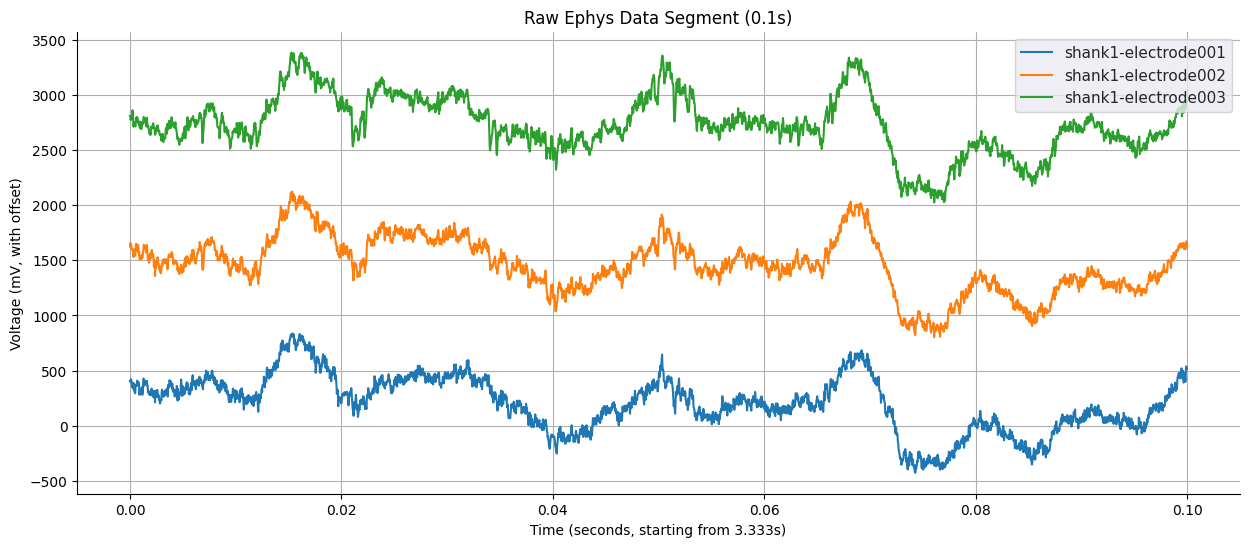

In [7]:
if "time_series" in nwbfile.acquisition:
    ephys_ts = nwbfile.acquisition["time_series"]
    fs = ephys_ts.rate  # Sampling rate

    # Define the segment to plot
    duration_to_plot_s = 0.1  # seconds
    num_samples_to_plot = int(duration_to_plot_s * fs)
    start_sample = 100000  # Arbitrary start point, to avoid initial artifacts if any
    end_sample = start_sample + num_samples_to_plot

    # Select a few channels to plot
    num_channels_to_plot = 3
    channel_indices = np.arange(num_channels_to_plot) # e.g., first 3 channels
    
    # Get actual channel labels if available from electrodes table, otherwise use indices
    channel_labels = [f"Channel {i}" for i in channel_indices]
    if nwbfile.electrodes is not None and 'label' in nwbfile.electrodes.colnames:
        try:
            # Assuming electrode labels correspond to data columns by index
            all_labels = nwbfile.electrodes['label'][:]
            channel_labels = [all_labels[i] if i < len(all_labels) else f"Channel {i}" for i in channel_indices]
        except Exception as e:
            print(f"Could not retrieve electrode labels: {e}. Using default labels.")


    print(f"Plotting {duration_to_plot_s}s of data ({num_samples_to_plot} samples) from {start_sample / fs:.3f}s for channels: {channel_labels}")

    # Load the data segment for the selected channels
    # Note: ephys_ts.data is an HDF5 dataset. Slicing directly accesses data.
    try:
        data_segment = ephys_ts.data[start_sample:end_sample, channel_indices]
        if ephys_ts.conversion != 1.0: # Apply conversion factor to get to Volts/mV
            data_segment = data_segment * ephys_ts.conversion

        time_vector = np.linspace(0, duration_to_plot_s, num_samples_to_plot, endpoint=False)

        # Create the plot
        plt.figure(figsize=(15, 6))
        # Do not use seaborn styling for this kind of plot
        with plt.style.context('default'):
            for i, ch_idx in enumerate(channel_indices):
                # Offset traces for clarity
                offset = i * np.std(data_segment[:, i]) * 5 # Arbitrary offset
                plt.plot(time_vector, data_segment[:, i] + offset, label=channel_labels[i])
        
        plt.xlabel(f"Time (seconds, starting from {start_sample / fs:.3f}s)")
        plt.ylabel(f"Voltage ({ephys_ts.unit}, with offset)")
        plt.title(f"Raw Ephys Data Segment ({duration_to_plot_s}s)")
        plt.legend(loc='upper right')
        plt.grid(True)
        sns.despine() # Apply seaborn despine if desired, even with default style
        plt.show()

    except Exception as e:
        print(f"Error plotting ephys data: {e}")
        print("Data shape:", ephys_ts.data.shape)
        print("Requested slice:", (start_sample, end_sample), channel_indices)

else:
    print("TimeSeries 'time_series' not found in acquisition, skipping ephys plot.")

### Visualizing Spike Times (Raster Plot)
If `nwbfile.units` exists, we can plot spike times for a selection of units.
A raster plot is a common way to visualize this.

Creating raster plot for the first 10 units: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


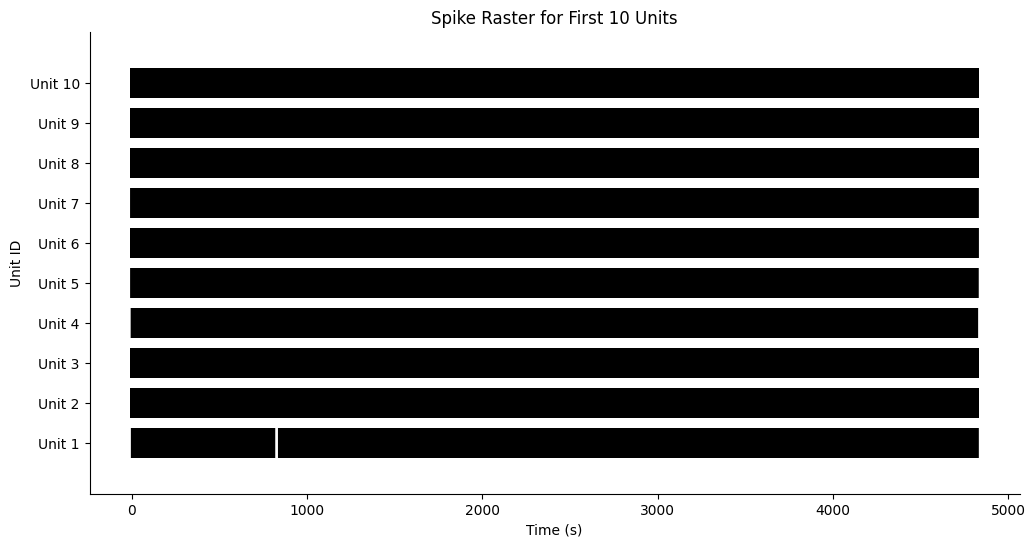

In [8]:
if nwbfile.units is not None and len(nwbfile.units.id[:]) > 0:
    units_df = nwbfile.units.to_dataframe() # We'll use this Convenience
    
    # Select a few units to plot
    num_units_to_plot = min(10, len(units_df)) # Plot up to 10 units
    unit_ids_to_plot = units_df.index[:num_units_to_plot]

    print(f"Creating raster plot for the first {num_units_to_plot} units: {list(unit_ids_to_plot)}")

    plt.figure(figsize=(12, 6))
    event_list = []
    for i, unit_id in enumerate(unit_ids_to_plot):
        # Get spike times for this unit. spike_times is a ragged array.
        # nwbfile.units['spike_times'][unit_id_index] will give the times for that unit.
        # The index in spike_times corresponds to the row index in the units table.
        unit_row_index = units_df.index.get_loc(unit_id) # Get integer index for the unit ID
        spike_times_for_unit = nwbfile.units['spike_times'][unit_row_index]
        
        # We need a numpy array of spike times for plotting
        # If spike_times_for_unit is already a numpy array, this does nothing.
        # If it's an h5py.Dataset or similar, this loads it into memory.
        spike_times_for_unit_np = np.array(spike_times_for_unit)

        # Add to event list for plt.eventplot
        event_list.append(spike_times_for_unit_np)

    # Use plt.eventplot for raster plot
    # Do not use seaborn styling for this kind of plot
    with plt.style.context('default'):
        plt.eventplot(event_list, linelengths=0.75, colors='black')
    
    plt.yticks(np.arange(num_units_to_plot), [f"Unit {uid}" for uid in unit_ids_to_plot])
    plt.xlabel("Time (s)")
    plt.ylabel("Unit ID")
    plt.title(f"Spike Raster for First {num_units_to_plot} Units")
    
    # Optional: Limit x-axis to a specific time range if spikes are sparse or cover a long duration
    # For example, to zoom into the first 100 seconds:
    # x_min, x_max = 0, 100
    # relevant_spikes = any(np.any((times >= x_min) & (times <= x_max)) for times in event_list)
    # if relevant_spikes:
    #    plt.xlim(x_min, x_max)
    # else:
    #    print("No spikes in the first 100s for the selected units. Showing full range or auto-scaled.")
    
    sns.despine() # Apply seaborn despine
    plt.show()

else:
    print("No units data or no units found, skipping raster plot.")

### Visualizing Trial Information
We can visualize the start and stop times of trials.

Plotting trial intervals for the first 20 trials (if available).


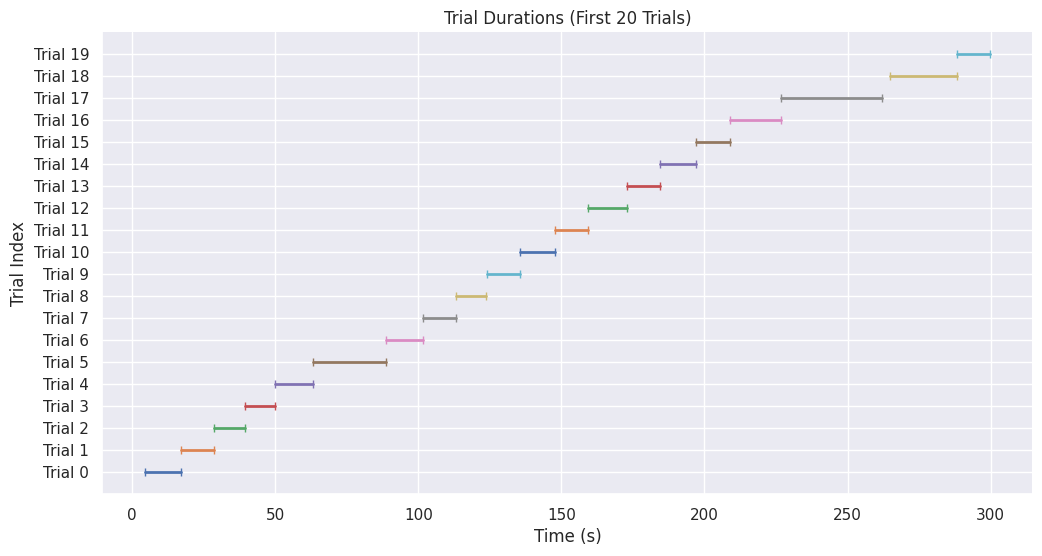

In [9]:
if trials_data is not None and 'start_time' in trials_data.colnames and 'stop_time' in trials_data.colnames:
    trials_df = trials_data.to_dataframe()
    
    print(f"Plotting trial intervals for the first 20 trials (if available).")
    num_trials_to_plot = min(20, len(trials_df))

    plt.figure(figsize=(12, 6))
    for i in range(num_trials_to_plot):
        start = trials_df['start_time'].iloc[i]
        stop = trials_df['stop_time'].iloc[i]
        plt.plot([start, stop], [i, i], marker='|', linestyle='-', lw=2)

    plt.yticks(np.arange(num_trials_to_plot), [f"Trial {trials_df.index[i]}" for i in range(num_trials_to_plot)])
    plt.xlabel("Time (s)")
    plt.ylabel("Trial Index")
    plt.title(f"Trial Durations (First {num_trials_to_plot} Trials)")
    plt.ylim(-1, num_trials_to_plot) # Adjust y-limits for better spacing
    sns.despine()
    plt.show()
else:
    print("No trial data with start/stop times found, skipping trial visualization.")

## 5. Summary and Future Directions

This notebook demonstrated how to:
- Connect to the DANDI Archive and retrieve information about a Dandiset.
- Load a specific NWB file from Dandiset 001375.
- Inspect basic metadata and structure of the NWB file, including electrodes, ephys acquisition, trials, and units.
- Visualize example data:
    - A segment of raw electrophysiological recordings.
    - Spike times for selected units using a raster plot.
    - Trial start and stop times.

### Possible Future Directions for Analysis:
This initial exploration opens up several avenues for more in-depth analysis:
1.  **Detailed Ephys Analysis:**
    *   Examine spectral properties of LFP signals (e.g., power spectral density in different brain states or trial periods).
    *   Perform event-triggered LFP averaging (e.g., around trial starts).
2.  **Spike Train Analysis:**
    *   Calculate firing rates of units across different conditions or time periods.
    *   Investigate inter-spike intervals (ISIs) and their distributions.
    *   Explore cross-correlations between pairs of units to infer functional connectivity.
    *   Relate neuronal spiking activity to behavioral events or trial types if more detailed behavioral data is available and linked.
3.  **Behavioral Correlations:**
    *   If detailed behavioral data (e.g., animal's position, speed, specific task events) is available within the NWB file or linked externally, correlate neural activity (LFP, spikes) with these behavioral variables. The current NWB file `session_description` ("mouse running laps in virtual hallway") and `trials` table suggest that such analysis might be possible.
4.  **Cross-Session/Animal Comparisons:**
    *   If applicable, extend these analyses to other NWB files within the Dandiset, potentially comparing results across different subjects or experimental conditions. The Dandiset description mentions "Pilot study," suggesting multiple experiments might be involved.

Remember that this notebook provides a starting point. The actual data within the NWB file (types of measurements, richness of metadata, data quality) will dictate the most appropriate and fruitful analyses. Always consult the Dandiset's documentation and related publications for context.

This concludes our exploratory notebook for Dandiset 001375.

In [10]:
# Close the HDF5 file associated with the NWB file reader
# This is good practice, especially when dealing with remote files or many files.
try:
    if io: # io is the NWBHDF5IO instance
        io.close()
    # h5_file and remote_file might also need explicit closing if not handled by NWBHDF5IO.close()
    # or if they were opened in a 'with' statement (which they are not here for h5_file).
    # remfile.File does not seem to have an explicit close method in typical examples,
    # but h5py.File does.
    if 'h5_file' in locals() and h5_file.__bool__(): # Check if h5py.File object is open
         h5_file.close()
    print("NWB I/O and HDF5 file closed.")
except NameError:
    # This means io or h5_file was not defined, e.g., if loading failed earlier.
    pass
except Exception as e:
    print(f"An error occurred while trying to close files: {e}")

NWB I/O and HDF5 file closed.
